# Programming Exercise 3:
## Multi-class Classification and Neural Networks

In this exercise, you will implement one-vs-all logistic regression and neural
networks to recognize hand-written digits. Before starting the programming
exercise, we strongly recommend watching the video lectures and completing
the review questions for the associated topics.

For this exercise, you will use logistic regression and neural networks to
recognize handwritten digits (from 0 to 9). Automated handwritten digit
recognition is widely used today - from recognizing zip codes (postal codes)
on mail envelopes to recognizing amounts written on bank checks. This
exercise will show you how the methods you've learned can be used for this
classication task.
In the rst part of the exercise, you will extend your previous implemen-
tion of logistic regression and apply it to one-vs-all classification.

In [10]:
# import necessary libraries
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

### Load data

You are given a data set in ex3data1.mat that contains 5000 training exam-
ples of handwritten digits.2 The .mat format means that that the data has
been saved in a native Octave/MATLAB matrix format, instead of a text
(ASCII) format like a csv-file.

There are 5000 training examples in ex3data1.mat, where each training
example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a 
oating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is \unrolled" into a 400-dimensional
vector. Each of these training examples becomes a single row in our data
matrix X. This gives us a 5000 by 400 matrix X where every row is a training
example for a handwritten digit image.

In [11]:
# load data
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']

### Visualize data

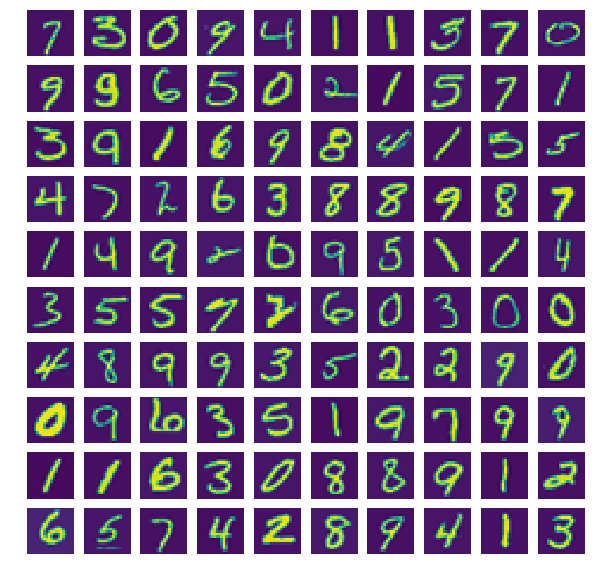

In [12]:
_, arrAx = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        arrAx[i,j].imshow(X[np.random.randint(X.shape[0])].reshape((20, 20), order='F'))
        arrAx[i,j].axis('off')
plt.show() 

In [13]:
# add intercept term
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X))
(m, n) = X.shape

In [14]:
# sigmoid function
def sigmoid(x):
    '''implementation of sigmoid activation function'''    
    return 1 / (1 + np.exp(-x))

In [42]:
# cost function of logistic regression
def cost(theta, lambda_, X, y):
    '''vectorized cost function'''
    
    m = len(y)
    h_x = sigmoid(X.dot(theta))
    # regularized term
    reg = (lambda_ / (2*m)) * np.sum(np.square(theta[1:]))
    # cost
    J = (-1/m) * (np.log(h_x).T.dot(y) + np.log(1 - h_x).T.dot(1 - y)) + reg
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])    
       

In [28]:
# regularized gradient of cost function
def regGradient(theta, lambda_, X, y):
    '''cost function gradient, with regularization term'''
    
    m = len(y)
    h_x = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad = (1/m) * X.T.dot(h_x - y) + (lambda_ / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]    
    
    return grad.flatten()

### Parameters optimization

In [40]:
lambda_ = 0.1
k = 10 # number of classes/digits
theta = np.zeros((k, X.shape[1])) # all theta parameters 10x401
one_theta = np.zeros((X.shape[1], 1)) # initial theta param. 401x1

for i in np.arange(1, k+1):
    res = opt.minimize(cost, one_theta, args=(lambda_, X, (y == i)*1), method=None,
                      jac=regGradient, options={'maxiter':50})
    theta[i-1] = res.x
print(theta)    

[[ -2.39142338e+00   0.00000000e+00   0.00000000e+00 ...,   6.90403614e-04
    1.25548916e-07   0.00000000e+00]
 [ -3.01137869e+00   0.00000000e+00   0.00000000e+00 ...,   1.48908371e-03
   -1.69495224e-04   0.00000000e+00]
 [ -4.51398334e+00   0.00000000e+00   0.00000000e+00 ...,  -1.60669585e-05
    3.43368479e-07   0.00000000e+00]
 ..., 
 [ -8.41428002e+00   0.00000000e+00   0.00000000e+00 ...,  -6.96539602e-05
    6.26414118e-06   0.00000000e+00]
 [ -5.13253825e+00   0.00000000e+00   0.00000000e+00 ...,  -1.54282889e-04
    5.92217956e-06   0.00000000e+00]
 [ -4.38685169e+00   0.00000000e+00   0.00000000e+00 ...,  -3.60354278e-04
    9.53842298e-06   0.00000000e+00]]


In [38]:
# prediction function
def predict(theta, X):
    probs = sigmoid(X.dot(theta.T))
        
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return(np.argmax(probs, axis=1)+1)    

In [41]:
pred = predict(theta, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 93.24 %


## Neural Network

In the previous part of this exercise, we implemented multi-class logistic re-
gression to recognize handwritten digits. However, logistic regression cannot
form more complex hypotheses as it is only a linear classifier.

In this part of the exercise, you will implement a neural network to rec-
ognize handwritten digits using the same training set as before. The neural
network will be able to represent complex models that form non-linear hy-
potheses. For this week, you will be using parameters from a neural network
that we have already trained. Your goal is to implement the feedforward
propagation algorithm to use our weights for prediction. In next week's exercise,
you will write the backpropagation algorithm for learning the neural
network parameters.

Our neural network (NN)has 3 layers, an input layer, a
hidden layer and an output layer. Recall that our inputs are pixel values of
digit images. Since the images are of size 20x20, this gives us 400 input layer
units (excluding the extra bias unit which always outputs +1). As before,
the training data will be loaded into the variables X and y.
You have been provided with a set of network parameters $(\theta^{(1)};\theta^{(2)})$
already trained by us. These are stored in ex3weights.mat and will be
loaded into Theta1 and Theta2. The parameters have dimensions
that are sized for a neural network with 25 units in the second layer and 10
output units (corresponding to the 10 digit classes).

In [44]:
# load NN weights
weights = loadmat('ex3weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']
print("Shape theta1 = ", theta1.shape)
print("Shape sheta2 = ", theta2.shape)

Shape theta1 =  (25, 401)
Shape sheta2 =  (10, 26)


### Feedforward propagation

In [45]:
def forwardProp(theta, X_row):
    '''function propagates the row of features (X_row)
       forward. It assumes that features already include
       bias unit in the input layer.'''
    
    row = X_row
    for i in range(len(theta)):
        theta_i = theta[i] # i-th element of theta vector
        z = theta_i.dot(row)
        a = sigmoid(z)
        if i == len(theta)-1:
            return a
        a = np.insert(a, 0, 1) ## add bias unit
        row = a

In [46]:
def nn_predict(X_row, theta):
    '''forward propagates row of features through NN
       and predicts handwriten digit'''
    
    classes = list(range(1, 11))
    prediction = forwardProp(theta, X_row)
    return classes[np.argmax(np.array(prediction))]

In [49]:
# accuracy should be around 97%
thetas = [theta1, theta2]
num_correct = 0
num_total = 0
# list of incorect indices
incorect = []
for row in range(X.shape[0]):
    num_total += 1
    pred = nn_predict(X[row],thetas)
    if pred == int(y[row]):
        num_correct += 1 # correct prediction
    else:
        incorect.append((y[row], pred))
print("Training set accuracy is {:.2f}%.".format(num_correct/num_total*100))
for pred, act in incorect:
    print("Predicted number: ", pred[0])
    print("Actual number: ", act)

Training set accuracy is 97.52%.
Predicted number:  10
Actual number:  8
Predicted number:  10
Actual number:  9
Predicted number:  10
Actual number:  4
Predicted number:  10
Actual number:  6
Predicted number:  1
Actual number:  3
Predicted number:  1
Actual number:  7
Predicted number:  1
Actual number:  8
Predicted number:  1
Actual number:  4
Predicted number:  1
Actual number:  8
Predicted number:  1
Actual number:  2
Predicted number:  1
Actual number:  8
Predicted number:  1
Actual number:  4
Predicted number:  1
Actual number:  9
Predicted number:  2
Actual number:  6
Predicted number:  2
Actual number:  7
Predicted number:  2
Actual number:  5
Predicted number:  2
Actual number:  9
Predicted number:  2
Actual number:  4
Predicted number:  2
Actual number:  10
Predicted number:  2
Actual number:  4
Predicted number:  2
Actual number:  8
Predicted number:  2
Actual number:  6
Predicted number:  2
Actual number:  6
Predicted number:  2
Actual number:  4
Predicted number:  2
Actua